# Mini-Batch Gradient Descent

---


IMPORTING DATA SCIENCE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


IMPORT MACHINE LEARNING LIBRARIES AND CLASSES

In [ ]:
from sklearn.model_selection import train_test_split               #for splitting the data into test and training data
from sklearn.compose import ColumnTransformer                       #for transforming the columns
from sklearn.impute import SimpleImputer                             #for imputing the missing values
from sklearn.preprocessing import OneHotEncoder                      #one hot encoding
from sklearn.preprocessing import MinMaxScaler                        #standard scaling

from sklearn.datasets import load_diabetes

from sklearn.datasets import make_regression

import plotly.express as px
import plotly.graph_objects as go


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score                 # for accuracy score
from sklearn.model_selection import cross_val_score        # for cross validation score

from sklearn.linear_model import LinearRegression # Import the LinearRegression class
from sklearn.metrics import mean_squared_error, r2_score

# Loading and Information about the Dataset

In [ ]:
X , y = load_diabetes(return_X_y=True)

In [ ]:
X.shape

In [ ]:
X

In [ ]:
y.shape

In [ ]:
y

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=2)  # splitting the data into test and training data

In [ ]:
X_train.shape

#  Mini-Batch Gradient Descent REGRESSION

In [ ]:
import random


class MBGDRegressor:

  def __init__(self ,batch_size ,  learning_rate=0.01 , epochs=100):     # we are initializing the values as random weird values


      self.coef_ = None
      self.intercept_ = None

      self.lr = learning_rate
      self.epochs = epochs

      self.batch_size = batch_size

  def fit(self, X_train , y_train ):
        # we are initializing the coefficients
      self.intercept_  = 0
      self.coef_ = np.ones(X_train.shape[1])

# if there are 300 rows and we make a batch of 30 then get  j loop going on for 10times


      for i in range (self.epochs):

        for j in range(int(X_train.shape[0]/self.batch_size)):  # Creating mini batch for the loop

          idx = random.sample(range(X_train.shape[0]),self.batch_size)  # idx is the row that we are selecting for the computation to take place

          idx = random.sample(range(X_train.shape[0]),self.batch_size)

          y_hat = np.dot(X_train[idx] , self.coef_) + self.intercept_ # subset of X_train


          intercept_der = -2 * np.mean(y_train[idx] - y_hat)   # calculating the intercept derivative
          self.intercept_ = self.intercept_ - (self.lr * intercept_der)


          coef_der = -2 * np.dot((y_train[idx] - y_hat) , X_train[idx])  # calculating the coefficient derivative
          self.coef_ = self.coef_ - (self.lr * coef_der)



      print(self.intercept_ , self.coef_)

  def predict(self,X_test):
      return np.dot(X_test , self.coef_) + self.intercept_ # this is the prediction of the data that we gonna pass in the form of X_train and Y_train



Making an object of the Mini-Batch GD Regressor Class


In [ ]:
import random
random.sample(range(1,100),10)

In [ ]:
mbr = MBGDRegressor(batch_size = int(X_train.shape[0]/10),epochs =50 , learning_rate = 0.2 )

In [ ]:
mbr.fit (X_train , y_train)

In [ ]:
y_pred = mbr.predict(X_test)

In [ ]:
r2_score(y_test , y_pred)

# Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
print (reg.coef_)
print (reg.intercept_)

In [ ]:
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

Difference between the descent of Batch , Stochastic and Mini-Batch

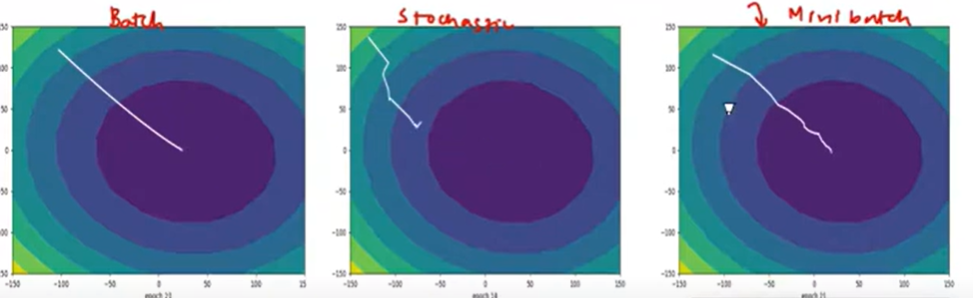